In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Chargement des données et visualisation

Voici les données qu'Hubble a compilées dans les années 20 :

In [27]:
hubble_df = pd.read_csv("hubble_data.csv", sep=",") # charge les données du fichier Hubble.csv dans un framework Pandas
print(hubble_df)

    distance  recession_velocity
0      0.032                 170
1      0.034                 290
2      0.214                -130
3      0.263                 -70
4      0.275                -185
5      0.275                -220
6      0.450                 200
7      0.500                 290
8      0.500                 270
9      0.630                 200
10     0.800                 300
11     0.900                 -30
12     0.900                 650
13     0.900                 150
14     0.900                 500
15     1.000                 920
16     1.100                 450
17     1.100                 500
18     1.400                 500
19     1.700                 960
20     2.000                 500
21     2.000                 850
22     2.000                 800
23     2.000                1090


...sinon on peut faire sans print aussi :

In [28]:
hubble_df
hubble_df.head(3) # pratique quand le tableau est trop grand...

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130


Les voici représentées en un nuage de points :

[0.032 0.034 0.214 0.263 0.275 0.275 0.45  0.5   0.5   0.63  0.8   0.9
 0.9   0.9   0.9   1.    1.1   1.1   1.4   1.7   2.    2.    2.    2.   ]


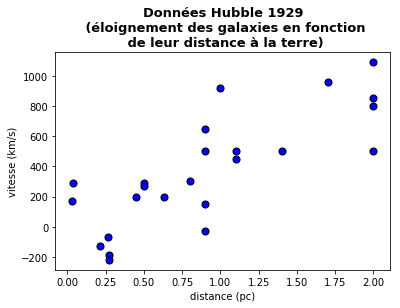

In [31]:
plt.title("Données Hubble 1929\n (éloignement des galaxies en fonction\n \
de leur distance à la terre)",fontweight="bold",fontsize=13)
plt.xlabel("distance (pc)")
plt.ylabel("vitesse (km/s)")

x = np.array(hubble_df["distance"].values) # ici on extrait seulement les valeurs bien que ...
y = np.array(hubble_df["recession_velocity"].values) # ...cela ne soit pas absolument nécessaire.
plot = plt.scatter(x,y,s=50,color='b',edgecolors='k',)

Créons maintenant un modèle de la répartition de ces données grâce à une régression linéaire (moindres carrés) appliquée à l'ensemble des données disponibles :

In [6]:
regr = linear_model.LinearRegression() # Crée un objet "régression linéaire"

x1 = x[:, np.newaxis] # les méthodes "fit" et "predict" ont besoin d'un tableau ...
y1 = y[:, np.newaxis]  # ...où les données sont chacune dans une ligne

regr.fit(x1, y1) # effectue la régression sur l'ensemble des données
y_pred = regr.predict(x1) # calcul des y à partir des x en se basant sur la droite des moindres carrés

Et affichons le résultat obtenu :

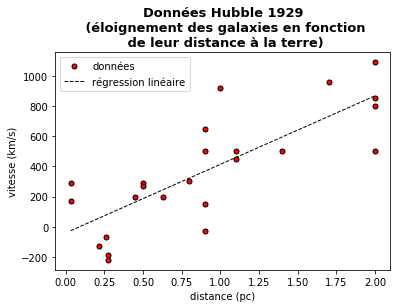

In [7]:
plt.title("Données Hubble 1929\n (éloignement des galaxies en fonction\n \
de leur distance à la terre)",fontweight="bold",fontsize=13)
plt.xlabel("distance (pc)")
plt.ylabel("vitesse (km/s)")
a, = plt.plot(x1,y1,'o',linestyle = ' ', markersize=5,markeredgecolor='k', markerfacecolor='red', label='données', zorder=10)
b, = plt.plot(x,y_pred,linestyle = '--', color='black', linewidth=1, label='régression linéaire',zorder=5)
plt.legend(handles=[a,b]).set_zorder(100)
plt.show()

# Bonus

Ici, vérifions que la régression linéaire de scikit learn est correcte.

## Calculs préliminaires
Calculons d'abord les moyennes, variances et covariance des données dont nous aurons besoin :

In [8]:
x_moy = np.mean(x)
y_moy = np.mean(y)

# variance de x
var_x_np = np.var(x)
var_x = np.mean(np.power(x,2)- np.power(x_moy,2)) # moyenne des carrés de x - produit de la moyenne de x
var_x_bis = np.mean(np.power(x-x_moy,2)) # moyenne des carrés des écarts de x à la moyenne
print("---Calculs de la variance (légères différences possibles) :")
print("numpy :",var_x_np)
print("définition :", var_x)
print("König-Huygens :", var_x_bis)

# covariance de x,y : moyenne des produits (plusieurs manières de faire le calcul)
cov_xy_np = np.cov(x,y,bias=True)[0][1] # attention à ne pas oublier bias = True !!! (ou ddof=0)
cov_xy = np.mean((x-x_moy)*(y-y_moy))  # moyenne du produit des écarts de x à xmoy et y à ymoy
cov_xy_bis = np.mean(x*y)- x_moy*y_moy # moyenne du produit des x et y - produit des moyennes
print("\n---Calculs de la covariance concordant (légères différences possibles) :")
print("numpy :",cov_xy_np)
print("définition :", cov_xy)
print("König-Huygens :", cov_xy_bis)

---Calculs de la variance (légères différences possibles) :
numpy : 0.39930373437499994
définition : 0.3993037343750001
König-Huygens : 0.39930373437499994

---Calculs de la covariance concordant (légères différences possibles) :
numpy : 181.3471614583333
définition : 181.34716145833332
König-Huygens : 181.34716145833335


## Calculs des coefficients de l'équation de la droite

Puis maintenant calculons le coefficient directeur et l'ordonnée à l'origine de la droite correspondant à la régression :

In [9]:
# pente de la droite de la régression

a = cov_xy_np/var_x_np # cela se démontre...
print("\n---Pente de la droite de régression linéaire : {}".format(a))
print("via calculs :", a)
print("via scikit learn :", regr.coef_)

b = y_moy-a*x_moy # ... et cela aussi.
print("\n---Ordonnée à l'origine : {}".format(b))
print("via calculs :", b)
print("via scikit learn :", regr.intercept_)



---Pente de la droite de régression linéaire : 454.15844092262836
via calculs : 454.15844092262836
via scikit learn : [[454.15844092]]

---Ordonnée à l'origine : -40.78364909586037
via calculs : -40.78364909586037
via scikit learn : [-40.7836491]


## Autres calculs...

Voici également quelques indicateurs statistiques disponibles :

In [24]:
print('Coefficients: \n', regr.coef_)
print('Coefficients: \n', regr.intercept_)
print("Erreur quadratique moyenne : %.2f" % mean_squared_error(x, y))
print('Score de variance : %.2f' % r2_score(x, y)) # 1 : prédiction parfaite
print('Score de la régression linéaire :', regr.score(x1,y1))

Coefficients: 
 [[454.15844092]]
Coefficients: 
 [-40.7836491]
Erreur quadratique moyenne : 270267.80
Score de variance : -676846.66
Score de la régression linéaire : 0.6235305209067517


## ... et pour le plaisir, un tracé final.

Ici, on s'est amusé à personnaliser la légende grace au calcul effectué plus haut :

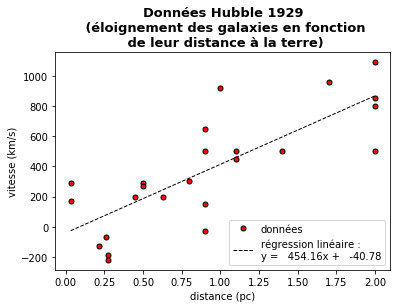

In [11]:
plt.title("Données Hubble 1929\n (éloignement des galaxies en fonction\n \
de leur distance à la terre)",fontweight="bold",fontsize=13)
plt.xlabel("distance (pc)")
plt.ylabel("vitesse (km/s)")
a, = plt.plot(x1,y1,'o',linestyle = ' ', markersize=5,markeredgecolor='k', \
    markerfacecolor='red', label='données', zorder=10)
b, = plt.plot(x,y_pred,linestyle = '--', color='black', linewidth=1,\
    label="régression linéaire :\ny = {:8.2f}x + {:8.2f}".format(regr.coef_[0,0],regr.intercept_[0]) ,zorder=5)
plt.legend(handles=[a,b]).set_zorder(100)
plt.show()